# Importando as bibliotecas e lendo os dados

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('bank-additional-full.csv',delimiter=';')


In [3]:
df = dataset.copy()

In [4]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

# Metadados

Bank client data:

*   Age (numeric)
*  Default: has credit in default? 
*  Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
*   Marital : marital status
*   Job : type of job 
*   Housing: has housing loan? 
*   Loan: has personal loan?



Related with the last contact of the current campaign:

*   Contact: contact communication type
*   Month: last contact month of year 
*   Dayofweek: last contact day of the week 
*   Duration: last contact duration 
      Important
    note: this attribute highly affects the output target (e.g., if
    duration=0 then y='no'). Yet, the duration is not known before a call
    is performed. Also, after the end of the call y is obviously known.
    Thus, this input should only be included for benchmark purposes and
    should be discarded if the intention is to have a realistic
    predictive model.


Other attributes:

1.   Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
1.   Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
2.   Previous: number of contacts performed before this campaign and for
this client (numeric)
2.   Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')



Social and economic context attributes

1.   Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
1.   Cons.price.idx: consumer price index - monthly indicator (numeric)
2.   Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
2.   Euribor3m: euribor 3 month rate - daily indicator (numeric)
5. Nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')


Como consta no metadados, vou excluir a coluna duration pois ela altamente determina quem contrata e quem não. Uma vez que pessoas que contratam obviamente ficarão mais tempo na ligação.

In [5]:
df.drop('duration',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

Grande parte das observações contém o valor 'unkown' isso atrapalha na análise. 

Vemos que 25% das observações contém um unkown em alguma das variáveis

In [21]:

len(df.loc[(df == 'unknown').any(axis=1)])/len(df)

0.25978440322424007

Irei transforma-los em null values..

In [22]:
df.replace(to_replace={'unknown': np.nan},inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

# Separando em treino e teste

In [24]:
from sklearn.model_selection import train_test_split
X = df.drop('y',axis=1)
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

A proporção da variável resposta se mantém em treino e teste

In [25]:
print(f'Conjunto Treino: {(y_train.value_counts()/len(y_train))[1]}')
print(f'Conjunto Teste: {(y_test.value_counts()/len(y_test))[1]}')

Conjunto Treino: 0.11244790722957057
Conjunto Teste: 0.11307290517177959


## Valores faltantes

In [26]:
X_train.isnull().mean()*100

age                0.000000
job                0.804494
marital            0.184816
education          4.254394
default           20.782750
housing            2.482334
loan               2.482334
contact            0.000000
month              0.000000
day_of_week        0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
dtype: float64

In [27]:
# Excluindo as observações para casos em que o numero de casos de null é baixo
X_train.drop(X_train[X_train.job.isnull()].index, axis= 0, inplace=True)
X_test.drop(X_test[X_test.job.isnull()].index, axis= 0, inplace=True)

X_train.drop(X_train[X_train.marital.isnull()].index, axis= 0, inplace=True)
X_test.drop(X_test[X_test.marital.isnull()].index, axis= 0, inplace=True)

X_train.drop(X_train[X_train.housing.isnull()].index, axis= 0, inplace=True)
X_test.drop(X_test[X_test.housing.isnull()].index, axis= 0, inplace=True)

X_train.drop(X_train[X_train.education.isnull()].index, axis= 0, inplace=True)
X_test.drop(X_test[X_test.education.isnull()].index, axis= 0, inplace=True)

y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [28]:
X_train.isnull().mean()*100

age                0.000000
job                0.000000
marital            0.000000
education          0.000000
default           20.202415
housing            0.000000
loan               0.000000
contact            0.000000
month              0.000000
day_of_week        0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
dtype: float64

A coluna default tem muitos valores faltantes, creio que vale investigar melhor a composição dessa feature.

É possível ver que ela não possui nenhum valor para nossa analise, uma vez que ou ela compõe 1 valor só, ou é nulo

In [30]:
X_train.default.value_counts(dropna=False)

no     20419
NaN     5170
yes        2
Name: default, dtype: int64

In [31]:
X_train.drop(columns=['default'], inplace=True)
X_test.drop(columns=['default'], inplace=True)

# Random Forest para feature selection

## Transformação das categóricas ordinal

Estou priorizando uma modelagem rápida para como benchmark. Como a Random Forest lida muito bem sem explicitar uma ordem que poderia fazer sentido aos dados. 

In [32]:
from sklearn.preprocessing import OrdinalEncoder

X_train_o = X_train.copy()
X_test_o = X_test.copy()



encoders = {}
for col,dtype in X_train_o.dtypes.items():
    
    if dtype == 'object':    
        encoders[col] = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value= -1)
        X_train_o.loc[:,col] = encoders[col].fit_transform(X_train_o[[col]]) # Aprenda e transforme no cojunto treino
        X_test_o.loc[:,col] = encoders[col].fit_transform(X_test_o[[col]]) # Só transofrme com os valores vistos no treino

# Vou acrescente uma variável aleatória para fins de comparação
X_train_o.loc[:,'___random___'] = np.random.randn(X_train_o.shape[0])
X_test_o.loc[:,'___random___'] = np.random.randn(X_test_o.shape[0])

In [33]:
X_train_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25591 entries, 8505 to 15795
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             25591 non-null  int64  
 1   job             25591 non-null  float64
 2   marital         25591 non-null  float64
 3   education       25591 non-null  float64
 4   housing         25591 non-null  float64
 5   loan            25591 non-null  float64
 6   contact         25591 non-null  float64
 7   month           25591 non-null  float64
 8   day_of_week     25591 non-null  float64
 9   campaign        25591 non-null  int64  
 10  pdays           25591 non-null  int64  
 11  previous        25591 non-null  int64  
 12  poutcome        25591 non-null  float64
 13  emp.var.rate    25591 non-null  float64
 14  cons.price.idx  25591 non-null  float64
 15  cons.conf.idx   25591 non-null  float64
 16  euribor3m       25591 non-null  float64
 17  nr.employed     25591 non-nu

## Label encoding

In [62]:
y_train_enc = y_train.replace(to_replace={'no':0,'yes':1})

8505     0
28321    1
2582     0
9407     0
33934    0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: y, Length: 25591, dtype: int64

## Modeling

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



params = {
    'criterion': ['gini','entropy'],
    'max_depth': [7,9,11,13,15],   
}

rf = GridSearchCV(
    RandomForestClassifier(n_estimators= 100,n_jobs= 4,random_state=42),
    params,
    cv=5,
    scoring= 'roc_auc',
    verbose=10
)


rf.fit(X_train_o, np.ravel(y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=7................................
[CV 1/5; 1/10] END .criterion=gini, max_depth=7;, score=0.787 total time=   1.4s
[CV 2/5; 1/10] START criterion=gini, max_depth=7................................
[CV 2/5; 1/10] END .criterion=gini, max_depth=7;, score=0.783 total time=   0.4s
[CV 3/5; 1/10] START criterion=gini, max_depth=7................................
[CV 3/5; 1/10] END .criterion=gini, max_depth=7;, score=0.791 total time=   0.4s
[CV 4/5; 1/10] START criterion=gini, max_depth=7................................
[CV 4/5; 1/10] END .criterion=gini, max_depth=7;, score=0.808 total time=   0.4s
[CV 5/5; 1/10] START criterion=gini, max_depth=7................................
[CV 5/5; 1/10] END .criterion=gini, max_depth=7;, score=0.800 total time=   0.3s
[CV 1/5; 2/10] START criterion=gini, max_depth=9................................
[CV 1/5; 2/10] END .criterion=gini, max_depth=9;

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=4, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11, 13, 15]},
             scoring='roc_auc', verbose=10)

In [21]:
rf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

## Evaluating

In [1]:
from sklearn.metrics import roc_auc_score

y_pred = rf.predict_proba(X_test_o)[:,1]

roc_auc_score(y_test_enc,y_pred)


NameError: name 'rf' is not defined

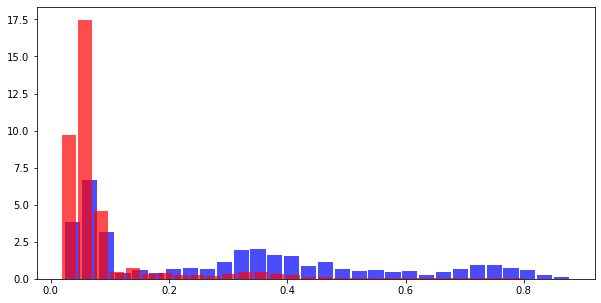

In [23]:
plt.figure(figsize = (10,5))

plt.hist(y_pred[y_test_enc == 1],bins=30, density=True, alpha= 0.7, rwidth= 0.9, color = 'b')
plt.hist(y_pred[y_test_enc == 0],bins=30, density=True, alpha= 0.7, rwidth= 0.9, color = 'r');

<Figure size 2160x360 with 0 Axes>

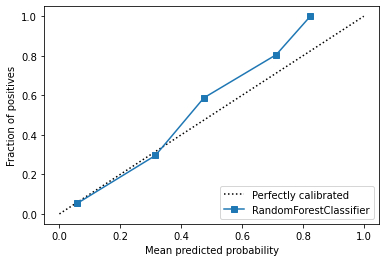

In [24]:
from sklearn.calibration import CalibrationDisplay

plt.figure(figsize=(30,5))
disp = CalibrationDisplay.from_estimator(rf.best_estimator_,X_train_o,y_train_enc)

plt.show()


Um bom score, mas o problema da Random Forest é que ela é pouco interpretável. Acima vemos que seus scores não trazem valor probabilistico. Porém o grande valor desse modelo é sua facilidade na modelagem e o retorno da importância das variáveis (aquelas que mais contribuem para a redução do caos (entropia ou gini), dessa forma usarei esse modelo para a seleção de variáveis

## Feature selecting

In [25]:
feature_importance = pd.DataFrame(np.column_stack((X_train_o.columns,rf.best_estimator_.feature_importances_)),columns=['columns','importance'])
feature_importance.sort_values('importance',ascending=False)


columns importance
17     nr.employed    0.20496
16       euribor3m   0.194619
13    emp.var.rate   0.128103
15   cons.conf.idx   0.088104
10           pdays   0.072099
12        poutcome   0.068647
7            month   0.048909
14  cons.price.idx   0.043746
0              age   0.026392
6          contact    0.02484
18    ___random___   0.022839
11        previous   0.018985
9         campaign   0.014593
8      day_of_week   0.014503
3        education   0.010799
1              job   0.007815
2          marital   0.005804
4          housing   0.002458
5             loan   0.001783

In [26]:
#descart_columns = feature_importance[feature_importance['importance'] <= 0.02]['columns'].unique()
descart_columns  = ['marital','housing','loan']

In [27]:
X_train_selected = X_train.drop(descart_columns,axis=1)
X_test_selected = X_test.drop(descart_columns,axis=1)
X_train_selected

age          job            education    contact month day_of_week  \
8505    43  blue-collar             basic.4y  telephone   jun         wed   
28321   35       admin.          high.school   cellular   apr         wed   
2582    34   management    university.degree  telephone   may         tue   
9407    49  blue-collar             basic.4y  telephone   jun         fri   
33934   52       admin.             basic.9y   cellular   may         wed   
...    ...          ...                  ...        ...   ...         ...   
6265    58      retired  professional.course  telephone   may         tue   
11284   37   management    university.degree  telephone   jun         thu   
38158   35       admin.          high.school   cellular   oct         thu   
860     40   management    university.degree  telephone   may         wed   
15795   29       admin.    university.degree   cellular   jul         mon   

       campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
8505          4    999         0  nonexistent           1.4          94.465   
28321         1    999         0  nonexistent          -1.8          93.075   
2582          3    999         0  nonexistent           1.1          93.994   
9407          4    999         0  nonexistent           1.4          94.465   
33934         2    999         1      failure          -1.8          92.893   
...         ...    ...       ...          ...           ...             ...   
6265          2    999         0  nonexistent           1.1          93.994   
11284         1    999         0  nonexistent           1.4          94.465   
38158         1      4         1      success          -3.4          92.431   
860           2    999         0  nonexistent           1.1          93.994   
15795         2    999         0  nonexistent           1.4          93.918   

       cons.conf.idx  euribor3m  nr.employed  
8505           -41.8      4.864       5228.1  
28321          -47.1      1.445       5099.1  
2582           -36.4      4.856       5191.0  
9407           -41.8      4.967       5228.1  
33934          -46.2      1.281       5099.1  
...              ...        ...          ...  
6265           -36.4      4.857       5191.0  
11284          -41.8      4.961       5228.1  
38158          -26.9      0.754       5017.5  
860            -36.4      4.856       5191.0  
15795          -42.7      4.960       5228.1  

[25591 rows x 15 columns]

# Correlação

Será feito o seguinte tratamento para os tipos de variáveis, entre:

Númericas e categóricas: Correlation_Ratio

Categóricas: Cramers-V

Númericas: Persons

In [28]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories.reset_index(drop=True))
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements.reset_index(drop=True)[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta


import scipy.stats as ss
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x,y)
  chi2 = ss.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [29]:
X_train_selected.select_dtypes(include ='object')

job            education    contact month day_of_week  \
8505   blue-collar             basic.4y  telephone   jun         wed   
28321       admin.          high.school   cellular   apr         wed   
2582    management    university.degree  telephone   may         tue   
9407   blue-collar             basic.4y  telephone   jun         fri   
33934       admin.             basic.9y   cellular   may         wed   
...            ...                  ...        ...   ...         ...   
6265       retired  professional.course  telephone   may         tue   
11284   management    university.degree  telephone   jun         thu   
38158       admin.          high.school   cellular   oct         thu   
860     management    university.degree  telephone   may         wed   
15795       admin.    university.degree   cellular   jul         mon   

          poutcome  
8505   nonexistent  
28321  nonexistent  
2582   nonexistent  
9407   nonexistent  
33934      failure  
...            ...  
6265   nonexistent  
11284  nonexistent  
38158      success  
860    nonexistent  
15795  nonexistent  

[25591 rows x 6 columns]

In [30]:
cor_df = pd.DataFrame(columns=X_train_selected.columns,index=X_train_selected.columns)
cor_num_vs_cat = pd.DataFrame(columns=X_train_selected.select_dtypes(exclude ='object').columns,index=X_train_selected.select_dtypes(include ='object').columns)
cor_num_vs_num = pd.DataFrame(columns=X_train_selected.select_dtypes(exclude ='object').columns,index=X_train_selected.select_dtypes(exclude ='object').columns)
cor_cat_vs_cat = pd.DataFrame(columns=X_train_selected.select_dtypes(include ='object').columns,index=X_train_selected.select_dtypes(include ='object').columns)
cols_analysed = []

for col,dtypes_col in X_train_selected.dtypes.items():
    
      for index,dtypes_idx in X_train_selected.dtypes.items():
        if ([col,index] in cols_analysed) or ([index,col] in cols_analysed):

              continue
        else:
          #Entre uma categorica e uma numerica
          if (dtypes_col == 'object' and dtypes_idx != 'object') or (dtypes_idx == 'object' and dtypes_col != 'object'):

            if (dtypes_col == 'object' and dtypes_idx != 'object'):
              cor = correlation_ratio(X_train_o[col], X_train_o[index])
              cor_num_vs_cat.loc[col,index] = cor
            elif (dtypes_idx == 'object' and dtypes_col != 'object'):
              cor = correlation_ratio(X_train_o[index], X_train_o[col])

              cor_num_vs_cat.loc[index,col] = cor

          #Entre duas categóricas
          elif dtypes_col == 'object' and dtypes_idx == 'object':
            cor = cramers_v(X_train_o[col], X_train_o[index])
            cor_cat_vs_cat.loc[index,col] = cor

          #Entre duas numéricas
          else:
            cor = X_train_o[col].corr(X_train_o[index],method='pearson')
            cor_num_vs_num.loc[index,col] = cor

          cols_analysed.append([col,index])
          cor_df.loc[index,col] = cor

cor_df = cor_df.astype('float64')
cor_cat_vs_cat = cor_cat_vs_cat.astype('float64')
cor_num_vs_cat = cor_num_vs_cat.astype('float64')
cor_num_vs_num = cor_num_vs_num.astype('float64')
cor_df


age       job  education   contact     month  \
age             1.000000       NaN        NaN       NaN       NaN   
job             0.495400  1.000000        NaN       NaN       NaN   
education       0.271268  0.389134   1.000000       NaN       NaN   
contact         0.003724  0.123413   0.119050  0.999915       NaN   
month           0.123036  0.109537   0.104923  0.608638  1.000000   
day_of_week     0.044249  0.014930   0.019086  0.054544  0.068111   
campaign        0.007721  0.027119   0.011934  0.078314  0.163692   
pdays          -0.040196  0.130395   0.061691  0.112669  0.245248   
previous        0.030462  0.119144   0.050102  0.206856  0.273264   
poutcome        0.041492  0.090648   0.050213  0.235741  0.244717   
emp.var.rate   -0.002631  0.183383   0.062336  0.387122  0.593716   
cons.price.idx  0.003797  0.121874   0.103490  0.589229  0.613250   
cons.conf.idx   0.121634  0.155499   0.125753  0.249825  0.613458   
euribor3m       0.007479  0.182285   0.054029  0.393423  0.580814   
nr.employed    -0.021314  0.209555   0.055710  0.263215  0.647765   

                day_of_week  campaign     pdays  previous  poutcome  \
age                     NaN       NaN       NaN       NaN       NaN   
job                     NaN       NaN       NaN       NaN       NaN   
education               NaN       NaN       NaN       NaN       NaN   
contact                 NaN       NaN       NaN       NaN       NaN   
month                   NaN       NaN       NaN       NaN       NaN   
day_of_week        1.000000       NaN       NaN       NaN       NaN   
campaign           0.041721  1.000000       NaN       NaN       NaN   
pdays              0.010767  0.048701  1.000000       NaN       NaN   
previous           0.009841 -0.076614 -0.575408  1.000000       NaN   
poutcome           0.009439  0.084247  0.954425  0.892425  1.000000   
emp.var.rate       0.032673  0.153645  0.266666 -0.418642  0.468105   
cons.price.idx     0.019642  0.129573  0.073588 -0.208174  0.311534   
cons.conf.idx      0.075707 -0.009914 -0.088976 -0.058850  0.185712   
euribor3m          0.042863  0.136982  0.290975 -0.448873  0.483713   
nr.employed        0.031343  0.145630  0.368965 -0.491855  0.503330   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                      NaN             NaN            NaN        NaN   
job                      NaN             NaN            NaN        NaN   
education                NaN             NaN            NaN        NaN   
contact                  NaN             NaN            NaN        NaN   
month                    NaN             NaN            NaN        NaN   
day_of_week              NaN             NaN            NaN        NaN   
campaign                 NaN             NaN            NaN        NaN   
pdays                    NaN             NaN            NaN        NaN   
previous                 NaN             NaN            NaN        NaN   
poutcome                 NaN             NaN            NaN        NaN   
emp.var.rate        1.000000             NaN            NaN        NaN   
cons.price.idx      0.772903        1.000000            NaN        NaN   
cons.conf.idx       0.210311        0.065697       1.000000        NaN   
euribor3m           0.972321        0.686185       0.291756   1.000000   
nr.employed         0.907393        0.519468       0.116820   0.945225   

                nr.employed  
age                     NaN  
job                     NaN  
education               NaN  
contact                 NaN  
month                   NaN  
day_of_week             NaN  
campaign                NaN  
pdays                   NaN  
previous                NaN  
poutcome                NaN  
emp.var.rate            NaN  
cons.price.idx          NaN  
cons.conf.idx           NaN  
euribor3m               NaN  
nr.employed             1.0

## Discretas

<AxesSubplot:>

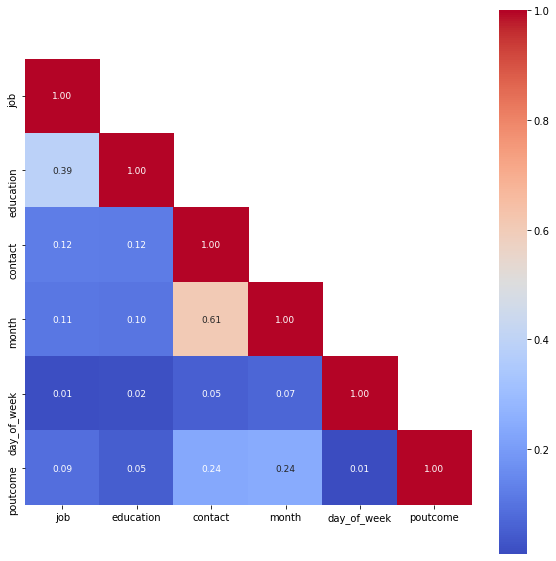

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(cor_cat_vs_cat.round(6),annot=True, square=True, fmt='.2f',annot_kws={'size':9},  cmap= "coolwarm")

## Continuas e discretas

<AxesSubplot:>

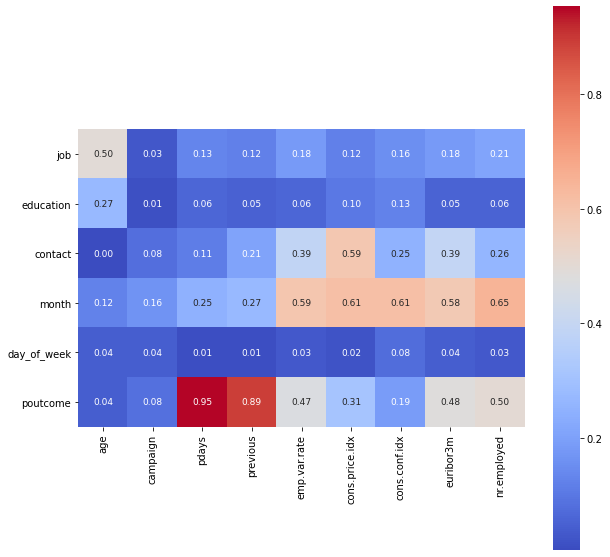

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(cor_num_vs_cat.round(6),annot=True, square=True, fmt='.2f',annot_kws={'size':9},  cmap= "coolwarm")

## Entre númericas

<AxesSubplot:>

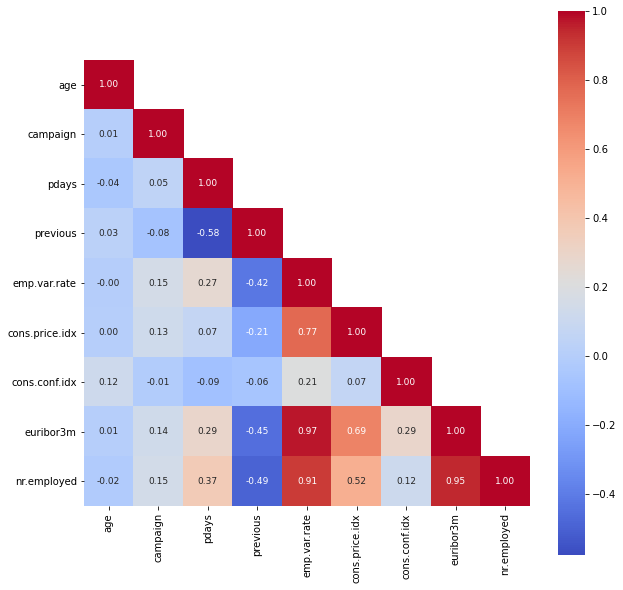

In [33]:

plt.figure(figsize=(10,10))
sns.heatmap(cor_num_vs_num.round(6),annot=True, square=True, fmt='.2f',annot_kws={'size':9},  cmap= "coolwarm")

Temos altimissa correlação entre as variáveis socio-economicas. Como irão impactar na modelagem, as variáveis correlacionadas são as seguintes:



- euribor3m e emp.var.rate
- nr.employed e emp.var.rate
- cons.price.ix e emp.var.rate
- previous e poutcome


### Excluindo as colunas correlacionadas
Aqui usarei o função mutual_info_regression do sklearn. O cálculo consiste basicamente na estimação de entropia nas distancias dos k-vizinhos. Não usei o Teste F para testar a covariância neste caso, pois este teste só reconhece depedência linear, enquanto o mutual_info_regression reconhece qualquer tipo de dependência covariáveis.

Como a variável **emp.var.rate** tem a menor co-dependência com a variável resposta. Irei exclui-la

In [34]:
from sklearn.feature_selection import mutual_info_classif

imm1 = mutual_info_classif(X_train_o[['emp.var.rate']],np.ravel(y_train_enc))
imm2 = mutual_info_classif(X_train_o[['euribor3m']],np.ravel(y_train_enc))
imm3 = mutual_info_classif(X_train_o[['nr.employed']],np.ravel(y_train_enc))
imm4 = mutual_info_classif(X_train_o[['cons.price.idx']],np.ravel(y_train_enc))

print(imm1,imm2,imm3,imm4)

[0.05397963] [0.0689273] [0.0596977] [0.06517825]


Entre **previous e poutcome** previous perde na co-dependência com a variável resposta. Irei exclui-la

In [35]:
imm5 = mutual_info_classif(X_train_o[['previous']],np.ravel(y_train_enc))
imm6 = mutual_info_classif(X_train_o[['poutcome']],np.ravel(y_train_enc))

print(imm5,imm4)

[0.0190333] [0.06517825]


In [36]:
X_train_selected[['poutcome']]

poutcome
8505   nonexistent
28321  nonexistent
2582   nonexistent
9407   nonexistent
33934      failure
...            ...
6265   nonexistent
11284  nonexistent
38158      success
860    nonexistent
15795  nonexistent

[25591 rows x 1 columns]

In [37]:
X_train_selected

age          job            education    contact month day_of_week  \
8505    43  blue-collar             basic.4y  telephone   jun         wed   
28321   35       admin.          high.school   cellular   apr         wed   
2582    34   management    university.degree  telephone   may         tue   
9407    49  blue-collar             basic.4y  telephone   jun         fri   
33934   52       admin.             basic.9y   cellular   may         wed   
...    ...          ...                  ...        ...   ...         ...   
6265    58      retired  professional.course  telephone   may         tue   
11284   37   management    university.degree  telephone   jun         thu   
38158   35       admin.          high.school   cellular   oct         thu   
860     40   management    university.degree  telephone   may         wed   
15795   29       admin.    university.degree   cellular   jul         mon   

       campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
8505          4    999         0  nonexistent           1.4          94.465   
28321         1    999         0  nonexistent          -1.8          93.075   
2582          3    999         0  nonexistent           1.1          93.994   
9407          4    999         0  nonexistent           1.4          94.465   
33934         2    999         1      failure          -1.8          92.893   
...         ...    ...       ...          ...           ...             ...   
6265          2    999         0  nonexistent           1.1          93.994   
11284         1    999         0  nonexistent           1.4          94.465   
38158         1      4         1      success          -3.4          92.431   
860           2    999         0  nonexistent           1.1          93.994   
15795         2    999         0  nonexistent           1.4          93.918   

       cons.conf.idx  euribor3m  nr.employed  
8505           -41.8      4.864       5228.1  
28321          -47.1      1.445       5099.1  
2582           -36.4      4.856       5191.0  
9407           -41.8      4.967       5228.1  
33934          -46.2      1.281       5099.1  
...              ...        ...          ...  
6265           -36.4      4.857       5191.0  
11284          -41.8      4.961       5228.1  
38158          -26.9      0.754       5017.5  
860            -36.4      4.856       5191.0  
15795          -42.7      4.960       5228.1  

[25591 rows x 15 columns]

In [38]:
X_train_selected.drop(['emp.var.rate','pdays'],axis=1,inplace=True)
X_test_selected.drop(['emp.var.rate','pdays'],axis=1,inplace=True)

if 'previous' in X_train_selected.columns:
    X_train_selected.drop(['previous'],axis=1,inplace=True)
    X_test_selected.drop(['previous'],axis=1,inplace=True)

X_train_selected

age          job            education    contact month day_of_week  \
8505    43  blue-collar             basic.4y  telephone   jun         wed   
28321   35       admin.          high.school   cellular   apr         wed   
2582    34   management    university.degree  telephone   may         tue   
9407    49  blue-collar             basic.4y  telephone   jun         fri   
33934   52       admin.             basic.9y   cellular   may         wed   
...    ...          ...                  ...        ...   ...         ...   
6265    58      retired  professional.course  telephone   may         tue   
11284   37   management    university.degree  telephone   jun         thu   
38158   35       admin.          high.school   cellular   oct         thu   
860     40   management    university.degree  telephone   may         wed   
15795   29       admin.    university.degree   cellular   jul         mon   

       campaign     poutcome  cons.price.idx  cons.conf.idx  euribor3m  \
8505          4  nonexistent          94.465          -41.8      4.864   
28321         1  nonexistent          93.075          -47.1      1.445   
2582          3  nonexistent          93.994          -36.4      4.856   
9407          4  nonexistent          94.465          -41.8      4.967   
33934         2      failure          92.893          -46.2      1.281   
...         ...          ...             ...            ...        ...   
6265          2  nonexistent          93.994          -36.4      4.857   
11284         1  nonexistent          94.465          -41.8      4.961   
38158         1      success          92.431          -26.9      0.754   
860           2  nonexistent          93.994          -36.4      4.856   
15795         2  nonexistent          93.918          -42.7      4.960   

       nr.employed  
8505        5228.1  
28321       5099.1  
2582        5191.0  
9407        5228.1  
33934       5099.1  
...            ...  
6265        5191.0  
11284       5228.1  
38158       5017.5  
860         5191.0  
15795       5228.1  

[25591 rows x 12 columns]

# Transformação das categóricas

In [39]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25591 entries, 8505 to 15795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             25591 non-null  int64  
 1   job             25591 non-null  object 
 2   education       25591 non-null  object 
 3   contact         25591 non-null  object 
 4   month           25591 non-null  object 
 5   day_of_week     25591 non-null  object 
 6   campaign        25591 non-null  int64  
 7   poutcome        25591 non-null  object 
 8   cons.price.idx  25591 non-null  float64
 9   cons.conf.idx   25591 non-null  float64
 10  euribor3m       25591 non-null  float64
 11  nr.employed     25591 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 2.5+ MB


In [40]:
X_train_selected.loc[:,X_train.dtypes == 'object']

job            education    contact month day_of_week  \
8505   blue-collar             basic.4y  telephone   jun         wed   
28321       admin.          high.school   cellular   apr         wed   
2582    management    university.degree  telephone   may         tue   
9407   blue-collar             basic.4y  telephone   jun         fri   
33934       admin.             basic.9y   cellular   may         wed   
...            ...                  ...        ...   ...         ...   
6265       retired  professional.course  telephone   may         tue   
11284   management    university.degree  telephone   jun         thu   
38158       admin.          high.school   cellular   oct         thu   
860     management    university.degree  telephone   may         wed   
15795       admin.    university.degree   cellular   jul         mon   

          poutcome  
8505   nonexistent  
28321  nonexistent  
2582   nonexistent  
9407   nonexistent  
33934      failure  
...            ...  
6265   nonexistent  
11284  nonexistent  
38158      success  
860    nonexistent  
15795  nonexistent  

[25591 rows x 6 columns]

### Ordinal Encoding

Dediquei a ordenar as variaies:

- month: Ordenado pela sequência dos meses do ano
- Education: Ordenado pelo grau de certificação

In [41]:
X_train_enc = X_train_selected.copy()
X_test_enc = X_test_selected.copy()

# MONTH
month_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
encoders = {}
encoders['month'] = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value= -1,categories=[month_order])
X_train_enc.loc[:,'month'] = encoders['month'].fit_transform(X_train_enc[['month']]) 
X_test_enc.loc[:,'month'] = encoders['month'].transform(X_test_enc[['month']]) 



# EDUCATION
education_order = [
      'illiterate',
      'basic.4y',
      'basic.6y',
      'basic.9y',
      'high.school',
      'professional.course',
      'university.degree'
]

if 'education' in X_train_selected.columns:
    encoders['education'] = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value= -1,categories=[education_order])
    
    X_train_enc.loc[:,'education'] = encoders['education'].fit_transform(X_train_enc[['education']]) 
    X_test_enc.loc[:,'education'] = encoders['education'].transform(X_test_enc[['education']]) 

### Dummies Encoding 

In [42]:

# Para as features categoricas sem ordenação
categoric_cols = X_train_enc.loc[:,X_train_enc.dtypes == 'object'].columns 
for e in categoric_cols:
  possiveis = pd.CategoricalDtype(X_train_enc[e].unique())
  X_train_enc.loc[:,e] = X_train_enc[e].astype(possiveis)
  X_test_enc.loc[:,e] = X_test_enc[e].astype(possiveis)


In [43]:
X_train_enc = pd.get_dummies(X_train_enc,drop_first=True)
X_test_enc = pd.get_dummies(X_test_enc,drop_first=True)

X_train_enc

age  education  month  campaign  cons.price.idx  cons.conf.idx  \
8505    43        1.0    3.0         4          94.465          -41.8   
28321   35        4.0    1.0         1          93.075          -47.1   
2582    34        6.0    2.0         3          93.994          -36.4   
9407    49        1.0    3.0         4          94.465          -41.8   
33934   52        3.0    2.0         2          92.893          -46.2   
...    ...        ...    ...       ...             ...            ...   
6265    58        5.0    2.0         2          93.994          -36.4   
11284   37        6.0    3.0         1          94.465          -41.8   
38158   35        4.0    7.0         1          92.431          -26.9   
860     40        6.0    2.0         2          93.994          -36.4   
15795   29        6.0    4.0         2          93.918          -42.7   

       euribor3m  nr.employed  job_admin.  job_management  job_retired  \
8505       4.864       5228.1           0               0            0   
28321      1.445       5099.1           1               0            0   
2582       4.856       5191.0           0               1            0   
9407       4.967       5228.1           0               0            0   
33934      1.281       5099.1           1               0            0   
...          ...          ...         ...             ...          ...   
6265       4.857       5191.0           0               0            1   
11284      4.961       5228.1           0               1            0   
38158      0.754       5017.5           1               0            0   
860        4.856       5191.0           0               1            0   
15795      4.960       5228.1           1               0            0   

       job_housemaid  job_self-employed  job_technician  job_student  \
8505               0                  0               0            0   
28321              0                  0               0            0   
2582               0                  0               0            0   
9407               0                  0               0            0   
33934              0                  0               0            0   
...              ...                ...             ...          ...   
6265               0                  0               0            0   
11284              0                  0               0            0   
38158              0                  0               0            0   
860                0                  0               0            0   
15795              0                  0               0            0   

       job_services  job_entrepreneur  job_unemployed  contact_cellular  \
8505              0                 0               0                 0   
28321             0                 0               0                 1   
2582              0                 0               0                 0   
9407              0                 0               0                 0   
33934             0                 0               0                 1   
...             ...               ...             ...               ...   
6265              0                 0               0                 0   
11284             0                 0               0                 0   
38158             0                 0               0                 1   
860               0                 0               0                 0   
15795             0                 0               0                 1   

       day_of_week_tue  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
8505                 0                0                0                0   
28321                0                0                0                0   
2582                 1                0                0                0   
9407                 0                1                0                0   
33934                0                0                0                0   
...          

# Tratamento das variáveis numéricas

In [44]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25591 entries, 8505 to 15795
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                25591 non-null  int64  
 1   education          25591 non-null  float64
 2   month              25591 non-null  float64
 3   campaign           25591 non-null  int64  
 4   cons.price.idx     25591 non-null  float64
 5   cons.conf.idx      25591 non-null  float64
 6   euribor3m          25591 non-null  float64
 7   nr.employed        25591 non-null  float64
 8   job_admin.         25591 non-null  uint8  
 9   job_management     25591 non-null  uint8  
 10  job_retired        25591 non-null  uint8  
 11  job_housemaid      25591 non-null  uint8  
 12  job_self-employed  25591 non-null  uint8  
 13  job_technician     25591 non-null  uint8  
 14  job_student        25591 non-null  uint8  
 15  job_services       25591 non-null  uint8  
 16  job_entrepreneur   

In [45]:
X_train_enc.describe()

age     education         month      campaign  cons.price.idx  \
count  25591.000000  25591.000000  25591.000000  25591.000000    25591.000000   
mean      39.812239      4.167754      3.627095      2.578602       93.571724   
std       10.299969      1.636254      2.050175      2.773371        0.576960   
min       17.000000      0.000000      0.000000      1.000000       92.201000   
25%       32.000000      3.000000      2.000000      1.000000       93.075000   
50%       38.000000      4.000000      3.000000      2.000000       93.444000   
75%       47.000000      6.000000      5.000000      3.000000       93.994000   
max       98.000000      6.000000      9.000000     43.000000       94.767000   

       cons.conf.idx     euribor3m   nr.employed    job_admin.  \
count   25591.000000  25591.000000  25591.000000  25591.000000   
mean      -40.559072      3.624450   5167.471681      0.261264   
std         4.629272      1.730716     71.987949      0.439332   
min       -50.800000      0.634000   4963.600000      0.000000   
25%       -42.700000      1.344000   5099.100000      0.000000   
50%       -41.800000      4.857000   5191.000000      0.000000   
75%       -36.400000      4.961000   5228.100000      1.000000   
max       -26.900000      5.045000   5228.100000      1.000000   

       job_management   job_retired  job_housemaid  job_self-employed  \
count    25591.000000  25591.000000   25591.000000       25591.000000   
mean         0.070962      0.040014       0.026572           0.035520   
std          0.256767      0.195996       0.160832           0.185094   
min          0.000000      0.000000       0.000000           0.000000   
25%          0.000000      0.000000       0.000000           0.000000   
50%          0.000000      0.000000       0.000000           0.000000   
75%          0.000000      0.000000       0.000000           0.000000   
max          1.000000      1.000000       1.000000           1.000000   

       job_technician   job_student  job_services  job_entrepreneur  \
count    25591.000000  25591.000000  25591.000000      25591.000000   
mean         0.164277      0.018835      0.097769          0.034114   
std          0.370534      0.135944      0.297008          0.181524   
min          0.000000      0.000000      0.000000          0.000000   
25%          0.000000      0.000000      0.000000          0.000000   
50%          0.000000      0.000000      0.000000          0.000000   
75%          0.000000      0.000000      0.000000          0.000000   
max          1.000000      1.000000      1.000000          1.000000   

       job_unemployed  contact_cellular  day_of_week_tue  day_of_week_fri  \
count    25591.000000      25591.000000     25591.000000     25591.000000   
mean         0.024579          0.641241         0.195030         0.189950   
std          0.154841          0.479646         0.396231         0.392269   
min          0.000000          0.000000         0.000000         0.000000   
25%          0.000000          0.000000         0.000000         0.000000   
50%          0.000000          1.000000         0.000000         0.000000   
75%          0.000000          1.000000         0.000000         0.000000   
max          1.000000          1.000000         1.000000         1.000000   

       day_of_week_mon  day_of_week_thu  poutcome_failure  poutcome_success  
count     25591.000000     25591.000000      25591.000000      25591.000000  
mean          0.204955         0.209214          0.102497          0.031847  
std           0.403677         0.406756          0.303307          0.175596  
min           0.000000         0.000000          0.000000          0.000000  
25%           0.000000         0.000000          0.000000          0.000000  
50%           0.000000         0.000000          0.000000          0.000000  
75%           0.000000         0.000000          0.000000          0.000000  
max           1.000000         1.000000          1.000000          1.000000

## Normalização

In [46]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25591 entries, 8505 to 15795
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                25591 non-null  int64  
 1   education          25591 non-null  float64
 2   month              25591 non-null  float64
 3   campaign           25591 non-null  int64  
 4   cons.price.idx     25591 non-null  float64
 5   cons.conf.idx      25591 non-null  float64
 6   euribor3m          25591 non-null  float64
 7   nr.employed        25591 non-null  float64
 8   job_admin.         25591 non-null  uint8  
 9   job_management     25591 non-null  uint8  
 10  job_retired        25591 non-null  uint8  
 11  job_housemaid      25591 non-null  uint8  
 12  job_self-employed  25591 non-null  uint8  
 13  job_technician     25591 non-null  uint8  
 14  job_student        25591 non-null  uint8  
 15  job_services       25591 non-null  uint8  
 16  job_entrepreneur   

In [47]:
from sklearn.preprocessing import StandardScaler

X_train_std = X_train_enc.copy()

numericas = X_train_selected.select_dtypes(exclude='object').columns


scalers = {}
X_train_std = X_train_enc.copy()
X_test_std = X_test_enc.copy()

for col in numericas:
  scaler = StandardScaler()
  scaler.fit(X_train_std[[col]])
  X_train_std.loc[:,col] = scaler.transform(X_train_std[[col]])
  X_test_std.loc[:,col] = scaler.transform(X_test_std[[col]])
  scalers[col] = scaler

# Regressão Logistica LASSO

## Modeling

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01,0.1,1,10,50]
}


lr1_std = LogisticRegression(penalty= 'l1',solver='saga', max_iter= 10000,random_state= 42,n_jobs=-1)
grid_std = GridSearchCV(lr1_std, params, cv=3, scoring= 'roc_auc',  verbose=10,return_train_score=True)
grid_std.fit(X_train_std,np.ravel(y_train_enc))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3; 1/5] START C=0.01......................................................
[CV 1/3; 1/5] END ...C=0.01;, score=(train=0.759, test=0.756) total time=   1.0s
[CV 2/3; 1/5] START C=0.01......................................................
[CV 2/3; 1/5] END ...C=0.01;, score=(train=0.759, test=0.756) total time=   0.5s
[CV 3/3; 1/5] START C=0.01......................................................
[CV 3/3; 1/5] END ...C=0.01;, score=(train=0.756, test=0.761) total time=   0.5s
[CV 1/3; 2/5] START C=0.1.......................................................
[CV 1/3; 2/5] END ....C=0.1;, score=(train=0.776, test=0.767) total time=   0.6s
[CV 2/3; 2/5] START C=0.1.......................................................
[CV 2/3; 2/5] END ....C=0.1;, score=(train=0.771, test=0.770) total time=   0.7s
[CV 3/3; 2/5] START C=0.1.......................................................
[CV 3/3; 2/5] END ....C=0.1;, score=(train=0.769,

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                          penalty='l1', random_state=42,
                                          solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 50]}, return_train_score=True,
             scoring='roc_auc', verbose=10)

## Avaliando

A AUC está dando um valor razoável, porém abaixo da random forest. A grande vantagem que temos na regressão logistica é sua interpretabilidade e probabilidade. Vamos tentar melhorar a predição fazendo a interação das variáveis

### Out-of-sample

In [49]:
#0.7677772168447594 - Selecionando as variáveis com a árvore de decisão
#0.7728434266623325 - Não selecionando

from sklearn.metrics import roc_auc_score
y_pred_std = grid_std.predict_proba(X_test_std)[:,1]

auc = roc_auc_score(y_test_enc, y_pred_std)
auc

0.7727917953276843

In [50]:
feature_importances = pd.DataFrame(np.column_stack((X_test_std.columns,grid_std.best_estimator_.coef_.reshape(-1))),columns=['col','coef'])
only_important_feat = feature_importances[feature_importances.coef.abs() > 0.01]
only_important_feat.loc[only_important_feat.coef.abs().sort_values(ascending = False).index]

col      coef
24   poutcome_success  1.282096
18   contact_cellular  0.805862
23   poutcome_failure  -0.54471
6           euribor3m -0.441805
7         nr.employed -0.435212
14        job_student   0.43227
10        job_retired   0.38331
21    day_of_week_mon -0.263466
4      cons.price.idx  0.243582
5       cons.conf.idx  0.198748
8          job_admin.   0.19186
17     job_unemployed  0.185268
3            campaign -0.162911
13     job_technician  0.135023
9      job_management  0.124131
20    day_of_week_fri -0.122379
16   job_entrepreneur  0.077557
15       job_services -0.055856
1           education  0.041913
12  job_self-employed  0.036705
19    day_of_week_tue -0.013242

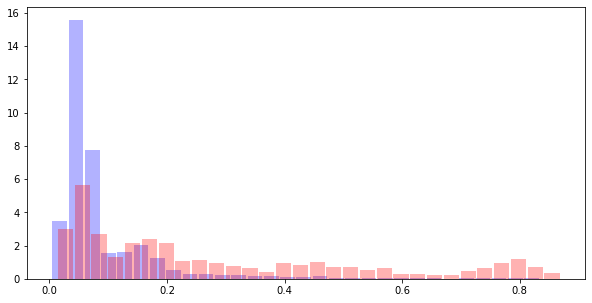

In [51]:
plt.figure(figsize=(10,5))
plt.hist(y_pred_std[y_test_enc == 0], bins=30, color='b', density=True, rwidth=.9, alpha=.3, label='no')
plt.hist(y_pred_std[y_test_enc == 1], bins=30, color='r', density=True, rwidth=.9, alpha=.3, label='yes')
plt.show()

<Figure size 2160x360 with 0 Axes>

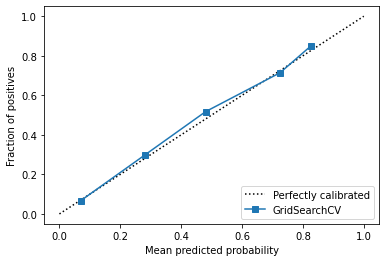

In [52]:
from sklearn.calibration import CalibrationDisplay

plt.figure(figsize=(30,5))
disp = CalibrationDisplay.from_estimator(grid_std,X_test_std,np.ravel(y_test_enc))

plt.show()


O modelo está bom e os score estão retornando um efeito de probabilidade, o que é ótimo para ser interpretável. Porém, como a regularização L1 acrescenta o termo de soma dos betas para "suavizar" a curva, empiricamente, perde o efeito de probabilildade. 

Usarei os betas gerados nessa regressão para fazer um segundo filtro nas minhas variáveis.

## Regressão Logística s/ Regularização

In [53]:
# X_train_std['euribor3m^2'] = X_train_std.euribor3m**2
# X_test_std['euribor3m^2'] = X_test_std.euribor3m**2

In [54]:
from sklearn.linear_model import LogisticRegression

lr_std = LogisticRegression(penalty= 'none', max_iter= 10000, random_state= 42,fit_intercept= True)
lr_std.fit(X_train_std[only_important_feat.col].values,np.ravel(y_train_enc))

LogisticRegression(max_iter=10000, penalty='none', random_state=42)

In [55]:
#0.7678641248371505 - selecionando as variáveis
#.7730602212166562 - não selecionando

y_pred_std_lr = lr_std.predict_proba(X_test_std[only_important_feat.col].values)[:,1]

auc = roc_auc_score(y_test_enc, y_pred_std_lr)
auc

0.7730033601888116

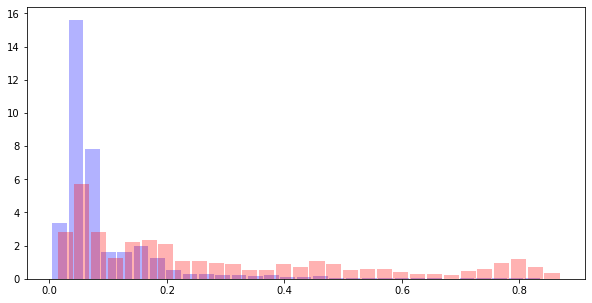

In [56]:
plt.figure(figsize=(10,5))
plt.hist(y_pred_std_lr[y_test_enc == 0], bins=30, color='b', density=True, rwidth=.9, alpha=.3, label='no')
plt.hist(y_pred_std_lr[y_test_enc == 1], bins=30, color='r', density=True, rwidth=.9, alpha=.3, label='yes')
plt.show()

O score da regressão sem regularização pode ser interprado como probabilidade

C:\Users\lippe\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Figure size 2160x360 with 0 Axes>

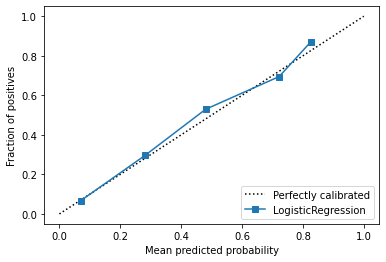

In [57]:
from sklearn.calibration import CalibrationDisplay

plt.figure(figsize=(30,5))
disp = CalibrationDisplay.from_estimator(lr_std,X_test_std[only_important_feat.col],y_test_enc)

plt.show()


### Análise dos coeficientes

In [58]:
feature_importances_lr = pd.DataFrame(np.column_stack((X_test_std[only_important_feat.col].columns,lr_std.coef_.reshape(-1))),columns=['col','coef'])
#only_important_feat = feature_importances_lr[feature_importances_lr.coef > 0.01]
feature_importances_lr.loc[feature_importances_lr.coef.sort_values(ascending = False).index]

col      coef
20   poutcome_success  1.283064
15   contact_cellular  0.798509
11        job_student  0.470257
8         job_retired  0.402235
2      cons.price.idx  0.268251
14     job_unemployed   0.22414
6          job_admin.  0.220487
3       cons.conf.idx  0.203592
10     job_technician  0.165473
7      job_management    0.1575
13   job_entrepreneur  0.115535
9   job_self-employed  0.078401
0           education  0.037849
16    day_of_week_tue -0.021353
12       job_services -0.038242
17    day_of_week_fri -0.131125
1            campaign -0.164118
18    day_of_week_mon  -0.27266
5         nr.employed -0.374108
4           euribor3m -0.522051
19   poutcome_failure -0.550309

#### Cliente médio

In [59]:
print('CLIENTE MÉDIO')
print(f'age: {(scalers["age"].mean_)}')
print(f'cons.price.idx {scalers["cons.price.idx"].mean_}')
print(f'cons.conf.idx: {scalers["cons.conf.idx"].mean_}')
print(f'euribor3m: {scalers["euribor3m"].mean_}')
print(f'nr.employed: {scalers["nr.employed"].mean_}')
print('contact: Telefone')
print('poutcome: indeterminado')
print(f'education: {education_order[0]}')
print('job: blue-collar')
print('day_of_week: wednesday')

CLIENTE MÉDIO
age: [39.81223868]
cons.price.idx [93.57172385]
cons.conf.idx: [-40.55907155]
euribor3m: [3.62444988]
nr.employed: [5167.47168145]
contact: Telefone
poutcome: indeterminado
education: illiterate
job: blue-collar
day_of_week: wednesday


In [60]:
lista = pd.Series(dtype='float64')
for e in X_test_std[only_important_feat.col].columns:
    lista[e] = 0.

    

def coef_probas(s,col=None,val=0):
    prob1 = round(lr_std.predict_proba(np.asarray(s).reshape(1, -1))[0][1]*100,2)
    if col == None:
        print(f'{prob1}%')
        
    else:        
        s[col] = val
        prob2 = round(lr_std.predict_proba(np.asarray(s).reshape(1, -1))[0][1]*100,2)
        print (f'{prob2}%\nMelhoria de {round(prob2-prob1,2)}%')
        s[col] = 0
    

Probabilidade do nosso cliente médio fechar

In [61]:
coef_probas(lista)

4.04%


# Primeiros insights para a área de negócios


#### Variáveis que impactam positivamente a variável resposta
**poutcome** - A variável mais importante na determinação se o contato será um sucesso é através do seu histórico, a poutcome. Foque em fidelização de clientes.

**job**	- Pessoas que não estão trabalhando estão entre os clientes que mais necessitam de um termo de depósito, foque a comunicação neles.

**contact** - Tenha prefêrencia por celular, pode impactar bastante na efetividade




#### Variáveis que impactam negativamente a variável resposta

**euribor3m** - Momentos em que a taxa de juros está alta, serão os que mais decaíram com as vendas. Talvez vale reduzir as campanhas para melhorar a eficacia

**nr.employed** - Momentos em que o emprego está mais alto irão impactar negativamente as vendas. Pessoas demandam menos empréstimo, uma vez que possuem uma renda. Vale optar por um marketing menos agressivo nesses momentos.

**day_of_week** - Evite contactar as pessoas no inicio da semana, principalmente as segundas-feiras.



### poutcome

<AxesSubplot:>

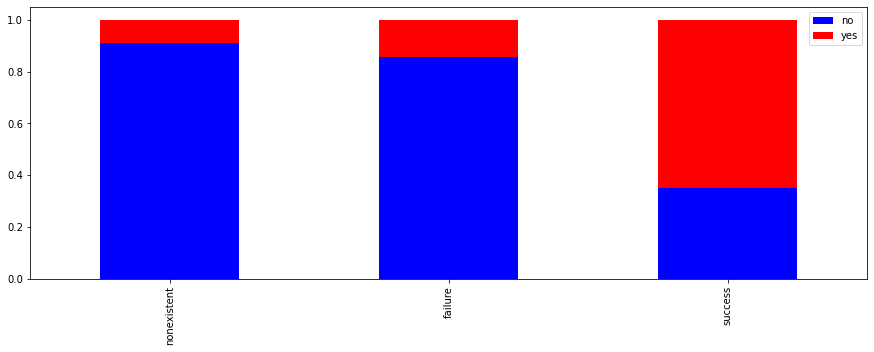

In [62]:
cnt_0 = df.loc[df.y=='no'].poutcome.value_counts(dropna=False)
cnt_1 = df.loc[df.y=='yes'].poutcome.value_counts(dropna=False)


aux = pd.concat([cnt_0.rename('no'),cnt_1.rename('yes')],axis=1).fillna(0)
aux = aux.div(aux.sum(axis='columns'),axis='rows')

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
aux.plot(ax=ax,kind='bar',stacked=True,color=['b','r'])


A probabilidade dos clientes que já fecharam,fecharemo novamente é mais alta

In [63]:
coef_probas(lista,'poutcome_success',1)


13.19%
Melhoria de 9.15%


Enquanto que para àqueles falharam, é bem mais baixa

In [64]:
coef_probas(lista,'poutcome_failure',1)

2.37%
Melhoria de -1.67%


### job

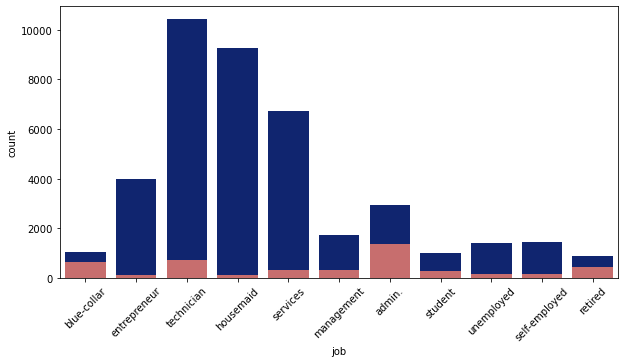

In [65]:
plt.figure(figsize=(10,5))
sns.set_color_codes("dark")
sns.countplot(x = df["job"], color ='b', label= 'total')

sns.set_color_codes("muted")
sns.countplot(x = df["job"].loc[df.y=='yes'],color ='r',label= 'success')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

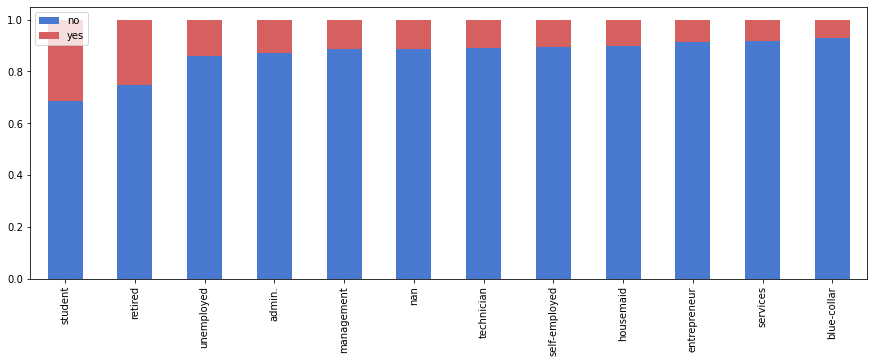

In [66]:
cnt_0 = df.loc[df.y=='no'].job.value_counts(dropna=False)
cnt_1 = df.loc[df.y=='yes'].job.value_counts(dropna=False)


aux = pd.concat([cnt_0.rename('no'),cnt_1.rename('yes')],axis=1).fillna(0)
aux = aux.div(aux.sum(axis='columns'),axis='rows').sort_values('no')

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
aux.plot(ax=ax,kind='bar',stacked=True,color=['b','r'])

As chances crescem para as pessoas que não possuem um emprego, muito provavalmente pela demanda de capital por não terem uma fonte de renda:

- Estudantes

- Aposentados

- Desempregados

In [67]:
coef_probas(lista,'job_student',1)
coef_probas(lista,'job_retired',1)
coef_probas(lista,'job_unemployed',1)

6.31%
Melhoria de 2.27%
5.92%
Melhoria de 1.88%
5.01%
Melhoria de 0.97%


### Contact

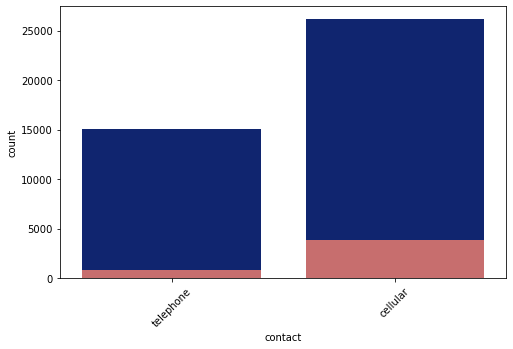

In [68]:
plt.figure(figsize=(8,5))
sns.set_color_codes("dark")
sns.countplot(x = df["contact"], color ='b', label= 'total')

sns.set_color_codes("muted")
sns.countplot(x = df["contact"].loc[df.y=='yes'],color ='r',label= 'success')
plt.xticks(rotation=45)
plt.show()

As ligações por celular são estatisticamente mais eficiente que as do telefone.

In [69]:
coef_probas(lista,'contact_cellular',1)

8.56%
Melhoria de 4.52%


### nr.employed

O gráfico seguinte nos mostra, a proporção de pessoas que contratam o termo de depósito, podemos ver que nos periodos de maior emprego, menos efetivo são as ligações.

<AxesSubplot:>

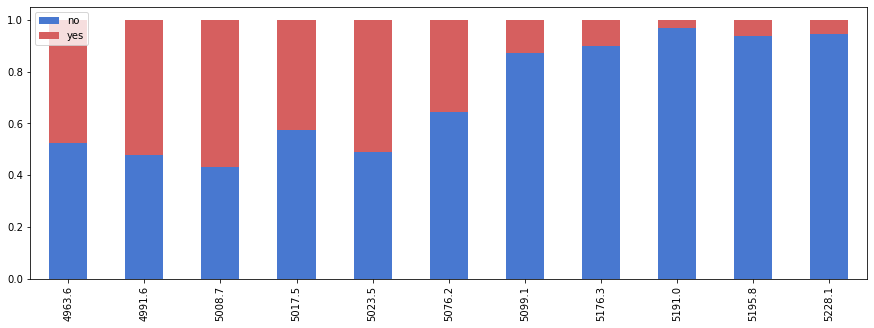

In [70]:
df["nr.employed"].value_counts()
cnt_0 = df.loc[df.y=='no']["nr.employed"].value_counts(dropna=False)
cnt_1 = df.loc[df.y=='yes']["nr.employed"].value_counts(dropna=False)


aux = pd.concat([cnt_0.rename('no'),cnt_1.rename('yes')],axis=1).fillna(0)
aux = aux.div(aux.sum(axis='columns'),axis='rows').sort_index()

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
aux.plot(ax=ax,kind='bar',stacked=True,color=['b','r'])

Porém, não necessariamente é uma causalidade do indice de emprego com a queda nas vendas. No gráfico seguinte, observamos que o maior número de clientes contatados foram em periodos de maior indice de emprego. A baixa eficácia por ser decorrente da exaustão de mercado.


C:\Users\lippe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lippe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


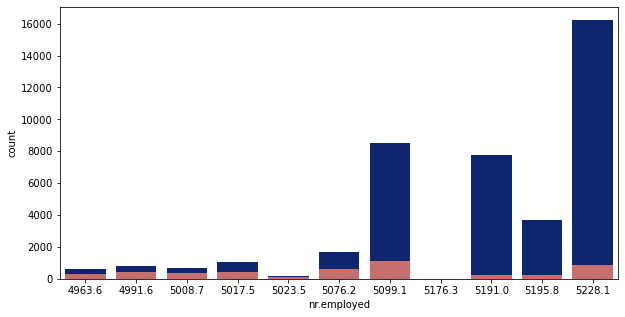

In [71]:
plt.figure(figsize=(10,5))
sns.set_color_codes("dark")
sns.countplot(df["nr.employed"],color ='b',label= 'total')

sns.set_color_codes("muted")
sns.countplot(df["nr.employed"].loc[df.y=='yes'],color ='r',label= 'success')
plt.show()

Vamos entender o motivo desse aumento de clientes nesses periodos

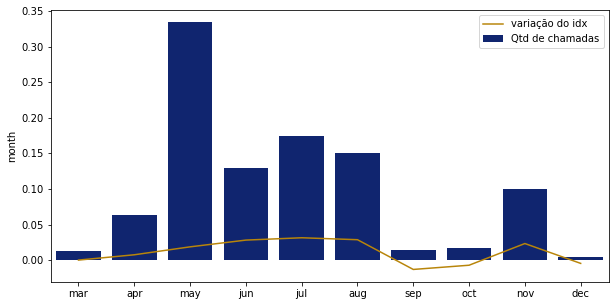

In [72]:
employ_month = df.groupby('month').mean().loc[month_order]["nr.employed"]
incial = employ_month.loc['mar']

plt.figure(figsize=(10,5))
sns.set_color_codes("dark")
plt.plot(employ_month.apply(lambda final : (final - incial)/incial),label='variação do idx',color='y')
sns.barplot(y = df['month'].value_counts(normalize=True), x = df['month'].value_counts(normalize=True).index,data= df,order=month_order,color='b',label='Qtd de chamadas')
plt.legend()
plt.show()

Existe uma forte correlação entre a variação do índice de emprego com a quantidade de chamadas ao longo do tempo. Seria necessário entender com o négocio o que os motivou focar boa parte de seus recursos nesses periodos

# Interação de features polinomiais




In [73]:
from sklearn.preprocessing import PolynomialFeatures

polyfeats = PolynomialFeatures(degree = 2, include_bias= False)
polyfeats.fit_transform(X_train_std[only_important_feat.col])

#polyfeats.transform(X_train_std)

array([[ 1.        ,  0.5125265 ,  1.54827623, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        , -0.56921088, -0.86094958, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.        ,  0.15194738,  0.73191266, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 4.        , -0.56921088, -1.97716642, ...,  0.        ,
         0.        ,  1.        ],
       [ 6.        , -0.20863175,  0.73191266, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.        , -0.20863175,  0.60018521, ...,  0.        ,
         0.        ,  0.        ]])

In [74]:
polyfeats.transform(X_train_std[only_important_feat.col]).shape

(25591, 252)

Tentando obter a rastreabilidade das colunas que transformamos em polinomiais

In [75]:
columns_list_poly = []
for e in range(0,polyfeats.powers_.shape[0]):
  col_list = X_train_std[only_important_feat.col].columns[polyfeats.powers_[e,:] > 0 ]
  col_pot = polyfeats.powers_[e,:].max()
  col_name = X_train_std[only_important_feat.col].columns[polyfeats.powers_[e,:] > 0 ][0]

  if len(col_list) == 2:
    col_name2 = X_train_std[only_important_feat.col].columns[polyfeats.powers_[e,:] > 0 ][1]
    columns_list_poly.append(f'{col_name}*{col_name2}')

  else:
    columns_list_poly.append(f'{col_name}^{col_pot}')
  
columns_list_poly

['education^1',
 'campaign^1',
 'cons.price.idx^1',
 'cons.conf.idx^1',
 'euribor3m^1',
 'nr.employed^1',
 'job_admin.^1',
 'job_management^1',
 'job_retired^1',
 'job_self-employed^1',
 'job_technician^1',
 'job_student^1',
 'job_services^1',
 'job_entrepreneur^1',
 'job_unemployed^1',
 'contact_cellular^1',
 'day_of_week_tue^1',
 'day_of_week_fri^1',
 'day_of_week_mon^1',
 'poutcome_failure^1',
 'poutcome_success^1',
 'education^2',
 'education*campaign',
 'education*cons.price.idx',
 'education*cons.conf.idx',
 'education*euribor3m',
 'education*nr.employed',
 'education*job_admin.',
 'education*job_management',
 'education*job_retired',
 'education*job_self-employed',
 'education*job_technician',
 'education*job_student',
 'education*job_services',
 'education*job_entrepreneur',
 'education*job_unemployed',
 'education*contact_cellular',
 'education*day_of_week_tue',
 'education*day_of_week_fri',
 'education*day_of_week_mon',
 'education*poutcome_failure',
 'education*poutcome_succ

In [76]:
X_train_std_poly = pd.DataFrame(polyfeats.transform(X_train_std[only_important_feat.col]),columns=columns_list_poly,index=X_train_std[only_important_feat.col].index)
X_test_std_poly = pd.DataFrame(polyfeats.transform(X_test_std[only_important_feat.col]),columns=columns_list_poly,index=X_test_std[only_important_feat.col].index)
X_train_std_poly

education^1  campaign^1  cons.price.idx^1  cons.conf.idx^1  \
8505           1.0    0.512527          1.548276        -0.268066   
28321          4.0   -0.569211         -0.860950        -1.412977   
2582           6.0    0.151947          0.731913         0.898446   
9407           1.0    0.512527          1.548276        -0.268066   
33934          3.0   -0.208632         -1.176402        -1.218558   
...            ...         ...               ...              ...   
6265           5.0   -0.208632          0.731913         0.898446   
11284          6.0   -0.569211          1.548276        -0.268066   
38158          4.0   -0.569211         -1.977166         2.950645   
860            6.0   -0.208632          0.731913         0.898446   
15795          6.0   -0.208632          0.600185        -0.462485   

       euribor3m^1  nr.employed^1  job_admin.^1  job_management^1  \
8505      0.716221       0.842217           0.0               0.0   
28321    -1.259301      -0.949784           1.0               0.0   
2582      0.711598       0.326843           0.0               1.0   
9407      0.775735       0.842217           0.0               0.0   
33934    -1.354062      -0.949784           1.0               0.0   
...            ...            ...           ...               ...   
6265      0.712176       0.326843           0.0               0.0   
11284     0.772268       0.842217           0.0               1.0   
38158    -1.658566      -2.083329           1.0               0.0   
860       0.711598       0.326843           0.0               1.0   
15795     0.771690       0.842217           1.0               0.0   

       job_retired^1  job_self-employed^1  job_technician^1  job_student^1  \
8505             0.0                  0.0               0.0            0.0   
28321            0.0                  0.0               0.0            0.0   
2582             0.0                  0.0               0.0            0.0   
9407             0.0                  0.0               0.0            0.0   
33934            0.0                  0.0               0.0            0.0   
...              ...                  ...               ...            ...   
6265             1.0                  0.0               0.0            0.0   
11284            0.0                  0.0               0.0            0.0   
38158            0.0                  0.0               0.0            0.0   
860              0.0                  0.0               0.0            0.0   
15795            0.0                  0.0               0.0            0.0   

       job_services^1  job_entrepreneur^1  job_unemployed^1  \
8505              0.0                 0.0               0.0   
28321             0.0                 0.0               0.0   
2582              0.0                 0.0               0.0   
9407              0.0                 0.0               0.0   
33934             0.0                 0.0               0.0   
...               ...                 ...               ...   
6265              0.0                 0.0               0.0   
11284             0.0                 0.0               0.0   
38158             0.0                 0.0               0.0   
860               0.0                 0.0               0.0   
15795             0.0                 0.0               0.0   

       contact_cellular^1  day_of_week_tue^1  day_of_week_fri^1  \
8505                  0.0                0.0                0.0   
28321                 1.0                0.0                0.0   
2582                  0.0                1.0                0.0   
9407                  0.0                0.0                1.0   
33934                 1.0                0.0                0.0   
...                   ...                ...                ...   
6265                  0.0                1.0                0.0   
11284                 0.0                0.0                0.0   
38158                 1.0                0.0        

Excluindo as interações que não fazem sentido. As colunas seguintes só possue um valor constante, como é possível observar

In [77]:
const_cols = X_train_std_poly.loc[:,X_train_std_poly.max() - X_train_std_poly.min() == 0]
const_cols.describe()

job_admin.*job_management  job_admin.*job_retired  \
count                    25591.0                 25591.0   
mean                         0.0                     0.0   
std                          0.0                     0.0   
min                          0.0                     0.0   
25%                          0.0                     0.0   
50%                          0.0                     0.0   
75%                          0.0                     0.0   
max                          0.0                     0.0   

       job_admin.*job_self-employed  job_admin.*job_technician  \
count                       25591.0                    25591.0   
mean                            0.0                        0.0   
std                             0.0                        0.0   
min                             0.0                        0.0   
25%                             0.0                        0.0   
50%                             0.0                        0.0   
75%                             0.0                        0.0   
max                             0.0                        0.0   

       job_admin.*job_student  job_admin.*job_services  \
count                 25591.0                  25591.0   
mean                      0.0                      0.0   
std                       0.0                      0.0   
min                       0.0                      0.0   
25%                       0.0                      0.0   
50%                       0.0                      0.0   
75%                       0.0                      0.0   
max                       0.0                      0.0   

       job_admin.*job_entrepreneur  job_admin.*job_unemployed  \
count                      25591.0                    25591.0   
mean                           0.0                        0.0   
std                            0.0                        0.0   
min                            0.0                        0.0   
25%                            0.0                        0.0   
50%                            0.0                        0.0   
75%                            0.0                        0.0   
max                            0.0                        0.0   

       job_management*job_retired  job_management*job_self-employed  \
count                     25591.0                           25591.0   
mean                          0.0                               0.0   
std                           0.0                               0.0   
min                           0.0                               0.0   
25%                           0.0                               0.0   
50%                           0.0                               0.0   
75%                           0.0                               0.0   
max                           0.0                               0.0   

       job_management*job_technician  job_management*job_student  \
count                        25591.0                     25591.0   
mean                             0.0                         0.0   
std                              0.0                         0.0   
min                              0.0                         0.0   
25%                              0.0                         0.0   
50%                              0.0                         0.0   
75%                              0.0                         0.0   
max                              0.0                         0.0   

       job_management*job_services  job_management*job_entrepreneur  \
count                      25591.0                          25591.0   
mean                           0.0                              0.0   
std                            0.0                              0.0   
min                            0.0                              0.0   
25%                            0.0                              0.0   
50%                            0.0                              0.0   
75%         

In [78]:
X_train_std_poly2 = X_train_std_poly.copy().drop(const_cols.columns,axis=1)
X_test_std_poly2 = X_test_std_poly.copy().drop(const_cols.columns,axis=1)
X_train_std_poly2

education^1  campaign^1  cons.price.idx^1  cons.conf.idx^1  \
8505           1.0    0.512527          1.548276        -0.268066   
28321          4.0   -0.569211         -0.860950        -1.412977   
2582           6.0    0.151947          0.731913         0.898446   
9407           1.0    0.512527          1.548276        -0.268066   
33934          3.0   -0.208632         -1.176402        -1.218558   
...            ...         ...               ...              ...   
6265           5.0   -0.208632          0.731913         0.898446   
11284          6.0   -0.569211          1.548276        -0.268066   
38158          4.0   -0.569211         -1.977166         2.950645   
860            6.0   -0.208632          0.731913         0.898446   
15795          6.0   -0.208632          0.600185        -0.462485   

       euribor3m^1  nr.employed^1  job_admin.^1  job_management^1  \
8505      0.716221       0.842217           0.0               0.0   
28321    -1.259301      -0.949784           1.0               0.0   
2582      0.711598       0.326843           0.0               1.0   
9407      0.775735       0.842217           0.0               0.0   
33934    -1.354062      -0.949784           1.0               0.0   
...            ...            ...           ...               ...   
6265      0.712176       0.326843           0.0               0.0   
11284     0.772268       0.842217           0.0               1.0   
38158    -1.658566      -2.083329           1.0               0.0   
860       0.711598       0.326843           0.0               1.0   
15795     0.771690       0.842217           1.0               0.0   

       job_retired^1  job_self-employed^1  job_technician^1  job_student^1  \
8505             0.0                  0.0               0.0            0.0   
28321            0.0                  0.0               0.0            0.0   
2582             0.0                  0.0               0.0            0.0   
9407             0.0                  0.0               0.0            0.0   
33934            0.0                  0.0               0.0            0.0   
...              ...                  ...               ...            ...   
6265             1.0                  0.0               0.0            0.0   
11284            0.0                  0.0               0.0            0.0   
38158            0.0                  0.0               0.0            0.0   
860              0.0                  0.0               0.0            0.0   
15795            0.0                  0.0               0.0            0.0   

       job_services^1  job_entrepreneur^1  job_unemployed^1  \
8505              0.0                 0.0               0.0   
28321             0.0                 0.0               0.0   
2582              0.0                 0.0               0.0   
9407              0.0                 0.0               0.0   
33934             0.0                 0.0               0.0   
...               ...                 ...               ...   
6265              0.0                 0.0               0.0   
11284             0.0                 0.0               0.0   
38158             0.0                 0.0               0.0   
860               0.0                 0.0               0.0   
15795             0.0                 0.0               0.0   

       contact_cellular^1  day_of_week_tue^1  day_of_week_fri^1  \
8505                  0.0                0.0                0.0   
28321                 1.0                0.0                0.0   
2582                  0.0                1.0                0.0   
9407                  0.0                0.0                1.0   
33934                 1.0                0.0                0.0   
...                   ...                ...                ...   
6265                  0.0                1.0                0.0   
11284                 0.0                0.0                0.0   
38158                 1.0                0.0        

### Excluindo colunas que possuem os mesmos valores.

Para isso irei usar o método T do pandas, que transpõe o meu dataframe

In [79]:
X_train_std_poly2.T.head()

8505      28321     2582      9407      33934     35648  \
education^1       1.000000  4.000000  6.000000  1.000000  3.000000  4.000000   
campaign^1        0.512527 -0.569211  0.151947  0.512527 -0.208632 -0.569211   
cons.price.idx^1  1.548276 -0.860950  0.731913  1.548276 -1.176402 -1.176402   
cons.conf.idx^1  -0.268066 -1.412977  0.898446 -0.268066 -1.218558 -1.218558   
euribor3m^1       0.716221 -1.259301  0.711598  0.775735 -1.354062 -1.375440   

                     27159     28154     5222      40555     40894     38466  \
education^1       5.000000  2.000000  1.000000  6.000000  1.000000  6.000000   
campaign^1       -0.569211 -0.208632 -0.569211 -0.569211 -0.569211  0.512527   
cons.price.idx^1 -0.644293 -0.860950  0.731913  1.087230  1.783999 -1.977166   
cons.conf.idx^1  -0.311271 -1.412977  0.898446  0.660823 -1.931427  2.950645   
euribor3m^1       0.229129 -1.247167  0.712176 -1.582295 -1.532604 -1.672433   

                     1558      18618     30014     29719     2898      25432  \
education^1       5.000000  6.000000  6.000000  6.000000  3.000000  6.000000   
campaign^1        0.151947 -0.569211 -0.569211 -0.569211  0.512527 -0.569211   
cons.price.idx^1  0.731913  0.600185 -0.860950 -0.860950  0.731913 -0.644293   
cons.conf.idx^1   0.898446 -0.462485 -1.412977 -1.412977  0.898446 -0.311271   
euribor3m^1       0.711020  0.776313 -1.282414 -1.282414  0.713332  0.286332   

                     17943     2018      21460     16172     7042      7627   \
education^1       5.000000  6.000000  6.000000  4.000000  6.000000  2.000000   
campaign^1        0.151947 -0.208632 -0.208632 -0.208632 -0.569211  0.151947   
cons.price.idx^1  0.600185  0.731913 -0.221378  0.600185  0.731913  0.731913   
cons.conf.idx^1  -0.462485  0.898446  0.963253 -0.462485  0.898446  0.898446   
euribor3m^1       0.772268  0.712176  0.773424  0.772268  0.713909  0.716221   

                     24588     20438     9362      36549     18734     24632  \
education^1       5.000000  6.000000  4.000000  4.000000  5.000000  1.000000   
campaign^1       -0.569211 -0.569211  0.151947 -0.569211  1.594264 -0.208632   
cons.price.idx^1 -0.644293 -0.221378  1.548276 -1.055074  0.600185 -0.644293   
cons.conf.idx^1  -0.311271  0.963253 -0.268066 -0.052046 -0.462485 -0.311271   
euribor3m^1       0.327357  0.775157  0.775735 -1.366196  0.776313  0.327357   

                     37840     13088     8233      2993      25839     1057   \
education^1       4.000000  5.000000  3.000000  6.000000  2.000000  4.000000   
campaign^1        0.151947 -0.569211  0.151947  0.151947 -0.208632 -0.208632   
cons.price.idx^1 -2.375815  0.600185  1.548276  0.731913 -0.644293  0.731913   
cons.conf.idx^1   1.978551 -0.462485 -0.268066  0.898446 -0.311271  0.898446   
euribor3m^1      -1.617542  0.772846  0.716221  0.713332  0.286332  0.711598   

                     39218     32957     28679     38029     32079     28432  \
education^1       4.000000  3.000000  1.000000  6.000000  3.000000  6.000000   
campaign^1       -0.569211 -0.569211 -0.569211 -0.208632  0.151947  3.397160   
cons.price.idx^1 -0.351372 -1.176402 -0.860950 -2.067296 -1.176402 -0.860950   
cons.conf.idx^1   1.244080 -1.218558 -1.412977  2.324184 -1.218558 -1.412977   
euribor3m^1      -1.717502 -1.343661 -1.279525 -1.642965 -1.335572 -1.265079   

                     11718     31806     9900      12244     18407     34368  \
education^1       6.000000  3.000000  6.000000  4.000000  1.000000  1.000000   
campaign^1        2.676001 -0.569211 -0.569211  2.676001 -0.569211 -0.569211   
cons.price.idx^1  1.548276 -1.176402  1.548276  0.600185  0.600185 -1.176402   
cons.conf.idx^1  -0.268066 -1.218558 -0.268066 -0.462485 -0.462485 -1.218558   
euribor3m^1       0.771112 -1.327483  0.771112  0.775157  0.776313 -1.362729   

                     9513      21935     7199      32398     26158     17928  \
education^1       3.000000  6.000000  6.000000  2.000000  3.000000  2.000000   
campaign^1   

In [80]:
duplicated_cols = X_train_std_poly2.columns[X_train_std_poly2.T.duplicated()]
duplicated_cols

Index(['job_admin.^2', 'job_management^2', 'job_retired^2',
       'job_self-employed^2', 'job_technician^2', 'job_student^2',
       'job_services^2', 'job_entrepreneur^2', 'job_unemployed^2',
       'contact_cellular^2', 'day_of_week_tue^2', 'day_of_week_fri^2',
       'day_of_week_mon^2', 'poutcome_failure^2', 'poutcome_success^2'],
      dtype='object')

In [81]:
X_train_std_poly2 = X_train_std_poly2.drop(duplicated_cols,axis=1)
X_test_std_poly2 = X_test_std_poly2.drop(duplicated_cols,axis=1)
X_test_std_poly2

education^1  campaign^1  cons.price.idx^1  cons.conf.idx^1  \
32884          4.0   -0.569211         -1.176402        -1.218558   
32206          3.0   -0.569211         -1.176402        -1.218558   
9403           4.0    0.512527          1.548276        -0.268066   
14020          4.0   -0.208632          0.600185        -0.462485   
17201          5.0   -0.569211          0.600185        -0.462485   
...            ...         ...               ...              ...   
15307          4.0   -0.208632          0.600185        -0.462485   
24479          5.0   -0.208632         -0.644293        -0.311271   
14673          6.0   -0.208632          0.600185        -0.462485   
20582          4.0    0.873106         -0.221378         0.963253   
25748          6.0    0.151947         -0.644293        -0.311271   

       euribor3m^1  nr.employed^1  job_admin.^1  job_management^1  \
32884    -1.343661      -0.949784           0.0               0.0   
32206    -1.335572      -0.949784           0.0               0.0   
9403      0.775735       0.842217           1.0               0.0   
14020     0.773424       0.842217           0.0               0.0   
17201     0.772846       0.842217           0.0               0.0   
...            ...            ...           ...               ...   
15307     0.769957       0.842217           0.0               0.0   
24479     0.327357       0.393522           0.0               0.0   
14673     0.772268       0.842217           0.0               1.0   
20582     0.775157       0.842217           0.0               0.0   
25748     0.286332       0.393522           0.0               0.0   

       job_retired^1  job_self-employed^1  job_technician^1  job_student^1  \
32884            0.0                  0.0               1.0            0.0   
32206            0.0                  0.0               0.0            0.0   
9403             0.0                  0.0               0.0            0.0   
14020            0.0                  0.0               0.0            0.0   
17201            1.0                  0.0               0.0            0.0   
...              ...                  ...               ...            ...   
15307            0.0                  0.0               0.0            0.0   
24479            0.0                  0.0               1.0            0.0   
14673            0.0                  0.0               0.0            0.0   
20582            0.0                  0.0               0.0            0.0   
25748            0.0                  0.0               1.0            0.0   

       job_services^1  job_entrepreneur^1  job_unemployed^1  \
32884             0.0                 0.0               0.0   
32206             0.0                 0.0               0.0   
9403              0.0                 0.0               0.0   
14020             0.0                 0.0               0.0   
17201             0.0                 0.0               0.0   
...               ...                 ...               ...   
15307             1.0                 0.0               0.0   
24479             0.0                 0.0               0.0   
14673             0.0                 0.0               0.0   
20582             1.0                 0.0               0.0   
25748             0.0                 0.0               0.0   

       contact_cellular^1  day_of_week_tue^1  day_of_week_fri^1  \
32884                 1.0                0.0                0.0   
32206                 1.0                0.0                1.0   
9403                  0.0                0.0                1.0   
14020                 1.0                0.0                1.0   
17201                 1.0                0.0                1.0   
...                   ...                ...                ...   
15307                 1.0                0.0                1.0   
24479                 1.0                0.0                0.0   
14673                 1.0                1.0        

## Correlação

In [82]:
corr_cat = X_train_std_poly2.corr('spearman')
corr_cat

education^1  campaign^1  cons.price.idx^1  \
education^1                          1.000000    0.004474         -0.092114   
campaign^1                           0.004474    1.000000          0.096610   
cons.price.idx^1                    -0.092114    0.096610          1.000000   
cons.conf.idx^1                      0.111671    0.003682          0.253946   
euribor3m^1                          0.010294    0.137314          0.491857   
...                                       ...         ...               ...   
day_of_week_tue*poutcome_success     0.022992   -0.020583         -0.032730   
day_of_week_fri*poutcome_failure     0.007609   -0.011739         -0.136727   
day_of_week_fri*poutcome_success     0.017304    0.001995         -0.021657   
day_of_week_mon*poutcome_failure     0.007521   -0.015975         -0.122790   
day_of_week_mon*poutcome_success     0.013956   -0.010370         -0.023665   

                                  cons.conf.idx^1  euribor3m^1  nr.employed^1  \
education^1                              0.111671     0.010294      -0.001343   
campaign^1                               0.003682     0.137314       0.141557   
cons.price.idx^1                         0.253946     0.491857       0.467884   
cons.conf.idx^1                          1.000000     0.256435       0.153672   
euribor3m^1                              0.256435     1.000000       0.928619   
...                                           ...          ...            ...   
day_of_week_tue*poutcome_success         0.057144    -0.119934      -0.123067   
day_of_week_fri*poutcome_failure        -0.095868    -0.161342      -0.141777   
day_of_week_fri*poutcome_success         0.040195    -0.108190      -0.112059   
day_of_week_mon*poutcome_failure        -0.081751    -0.148269      -0.141647   
day_of_week_mon*poutcome_success         0.013417    -0.115560      -0.122201   

                                  job_admin.^1  job_management^1  \
education^1                           0.332365          0.208660   
campaign^1                            0.007207         -0.003402   
cons.price.idx^1                     -0.036976         -0.022087   
cons.conf.idx^1                       0.052585          0.000198   
euribor3m^1                           0.005688         -0.023542   
...                                        ...               ...   
day_of_week_tue*poutcome_success      0.021349          0.000691   
day_of_week_fri*poutcome_failure      0.004394         -0.001664   
day_of_week_fri*poutcome_success      0.004459          0.000282   
day_of_week_mon*poutcome_failure     -0.000156          0.000881   
day_of_week_mon*poutcome_success      0.008468         -0.004228   

                                  job_retired^1  job_self-employed^1  \
education^1                           -0.101502             0.086993   
campaign^1                            -0.014507             0.006411   
cons.price.idx^1                      -0.034243            -0.004516   
cons.conf.idx^1                        0.061606             0.003413   
euribor3m^1                           -0.093585             0.004353   
...                                         ...                  ...   
day_of_week_tue*poutcome_success       0.028578            -0.007475   
day_of_week_fri*poutcome_failure      -0.000448             0.000260   
day_of_week_fri*poutcome_success       0.036453            -0.011310   
day_of_week_mon*poutcome_failure       0.009405             0.004358   
day_of_week_mon*poutcome_success       0.026953            -0.005527   

                                  job_technician^1  job_student^1  \
education^1                               0.204678       0.001405   
campaign^1                                0.004499      -0.023386   
cons.price.idx^1                         -0.015477      -0.057637   
cons.conf.idx^1                           0.082454      -0.001741   
euribor3m^1                               0.092855      -0.117553   
...             

In [83]:
from sklearn.feature_selection import mutual_info_classif

X_train_std_poly3 = X_train_std_poly2.copy()
X_test_std_poly3 = X_test_std_poly2.copy()
dropped = []

for num1,col1 in enumerate(corr_cat.columns):
    if col1 in dropped: 
        continue # Pule se a coluna 1 já foi dropada
    for num2,col2 in enumerate(corr_cat.index):
        if col1 in dropped:
            break # Pare se a coluna 1 já foi dropada
        if col2 in dropped:
            continue # Continue se a coluna 2 já foi dropada
        if num2 <= num1: 
            continue # Continue se estou olhando para a diagonal inferior da matriz
        if col1==col2:
            continue # Continue se estou olhando para a diagonal da matriz. Pois sempre serão terão corr == 1
        val = corr_cat.loc[col2,col1]
        if val < .7:  # Continue se o valor da correção entre col2 e col1 foi inferior a esse
            continue
            
        
        #mutual_info_classif(y_train.values.reshape(-1,1),y_train)y_train_enc
        imm1 = mutual_info_classif(X_train_std_poly3[[col1]],np.ravel(y_train_enc))/mutual_info_classif(y_train_enc.reshape(-1,1),np.ravel(y_train_enc))
        imm2 = mutual_info_classif(X_train_std_poly3[[col2]],np.ravel(y_train_enc))/mutual_info_classif(y_train_enc.reshape(-1,1),np.ravel(y_train_enc))
        
        if imm1 > imm2:
            dropped.append(col2.strip())
            print(f'Entre {col1} e {col2}, descartamos {col2}')
        else:
            dropped.append(col1.strip())
            print(f'Entre {col1} e {col2}, descartamos {col1}')

X_train_std_poly3 = X_train_std_poly3.drop(dropped,axis=1)
X_test_std_poly3 = X_test_std_poly3.drop(dropped,axis=1)
X_train_std_poly3

Entre education^1 e education^2, descartamos education^2
Entre campaign^1 e education*campaign, descartamos campaign^1
Entre cons.price.idx^1 e education*cons.price.idx, descartamos cons.price.idx^1
Entre cons.conf.idx^1 e education*cons.conf.idx, descartamos education*cons.conf.idx
Entre cons.conf.idx^1 e cons.conf.idx*contact_cellular, descartamos cons.conf.idx*contact_cellular
Entre euribor3m^1 e nr.employed^1, descartamos nr.employed^1
Entre euribor3m^1 e education*euribor3m, descartamos education*euribor3m
Entre euribor3m^1 e education*nr.employed, descartamos education*nr.employed
Entre euribor3m^1 e euribor3m*contact_cellular, descartamos euribor3m*contact_cellular
Entre euribor3m^1 e nr.employed*contact_cellular, descartamos nr.employed*contact_cellular
Entre job_admin.^1 e education*job_admin., descartamos job_admin.^1
Entre job_management^1 e education*job_management, descartamos education*job_management
Entre job_management^1 e job_management*contact_cellular, descartamos jo

education^1  cons.conf.idx^1  euribor3m^1  job_retired^1  \
8505           1.0        -0.268066     0.716221            0.0   
28321          4.0        -1.412977    -1.259301            0.0   
2582           6.0         0.898446     0.711598            0.0   
9407           1.0        -0.268066     0.775735            0.0   
33934          3.0        -1.218558    -1.354062            0.0   
...            ...              ...          ...            ...   
6265           5.0         0.898446     0.712176            1.0   
11284          6.0        -0.268066     0.772268            0.0   
38158          4.0         2.950645    -1.658566            0.0   
860            6.0         0.898446     0.711598            0.0   
15795          6.0        -0.462485     0.771690            0.0   

       job_student^1  job_services^1  job_unemployed^1  contact_cellular^1  \
8505             0.0             0.0               0.0                 0.0   
28321            0.0             0.0               0.0                 1.0   
2582             0.0             0.0               0.0                 0.0   
9407             0.0             0.0               0.0                 0.0   
33934            0.0             0.0               0.0                 1.0   
...              ...             ...               ...                 ...   
6265             0.0             0.0               0.0                 0.0   
11284            0.0             0.0               0.0                 0.0   
38158            0.0             0.0               0.0                 1.0   
860              0.0             0.0               0.0                 0.0   
15795            0.0             0.0               0.0                 1.0   

       day_of_week_mon^1  poutcome_success^1  education*cons.price.idx  \
8505                 0.0                 0.0                  1.548276   
28321                0.0                 0.0                 -3.443798   
2582                 0.0                 0.0                  4.391476   
9407                 0.0                 0.0                  1.548276   
33934                0.0                 0.0                 -3.529206   
...                  ...                 ...                       ...   
6265                 0.0                 0.0                  3.659563   
11284                0.0                 0.0                  9.289657   
38158                0.0                 1.0                 -7.908666   
860                  0.0                 0.0                  4.391476   
15795                1.0                 0.0                  3.601111   

       education*job_admin.  education*day_of_week_fri  campaign^2  \
8505                    0.0                        0.0    0.262683   
28321                   4.0                        0.0    0.324001   
2582                    0.0                        0.0    0.023088   
9407                    0.0                        1.0    0.262683   
33934                   3.0                        0.0    0.043527   
...                     ...                        ...         ...   
6265                    0.0                        0.0    0.043527   
11284                   0.0                        0.0    0.324001   
38158                   4.0                        0.0    0.324001   
860                     0.0                        0.0    0.043527   
15795                   6.0                        0.0    0.043527   

       campaign*cons.price.idx  campaign*cons.conf.idx  campaign*euribor3m  \
8505                  0.793533               -0.137391            0.367082   
28321                 0.490062                0.804282            0.716808   
2582                  0.111212                0.136517            0.108125   
9407                  0.793533               -0.137391            0.397585   
33934                 0.245435                0.254230            0.282500   
...                        ...                     ...             

# Modelagem

## Regressão Logistica L1

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {
     'C': [0.5,1,10,100,1000]
}


lr1 = LogisticRegression(penalty= 'l1',solver='saga', max_iter= 10000, random_state= 42)
grid = GridSearchCV(lr1, params, cv=3, scoring= 'roc_auc',  verbose=10,return_train_score=True,n_jobs=-1)
grid.fit(X_train_std_poly3,np.ravel(y_train_enc))

#LogisticRegression(C=0.5, max_iter=10000, penalty='l1', solver='saga')
grid.best_estimator_

from sklearn.metrics import roc_auc_score
y_pred = grid.best_estimator_.predict_proba(X_test_std_poly3)[:,1]

auc = roc_auc_score(y_test_enc, y_pred)
auc

In [84]:
# thetas = pd.DataFrame(np.column_stack((X_train_std_poly3.columns,(grid.best_estimator_.coef_).reshape(-1,1))),columns=['features','theta'])
# non_zero_thetas = thetas.loc[thetas[abs(thetas.theta) > 0].theta.abs().sort_values(ascending=False).index]
# non_zero_thetas


In [85]:
X_train_std_poly3.head()

education^1  cons.conf.idx^1  euribor3m^1  job_retired^1  \
8505           1.0        -0.268066     0.716221            0.0   
28321          4.0        -1.412977    -1.259301            0.0   
2582           6.0         0.898446     0.711598            0.0   
9407           1.0        -0.268066     0.775735            0.0   
33934          3.0        -1.218558    -1.354062            0.0   

       job_student^1  job_services^1  job_unemployed^1  contact_cellular^1  \
8505             0.0             0.0               0.0                 0.0   
28321            0.0             0.0               0.0                 1.0   
2582             0.0             0.0               0.0                 0.0   
9407             0.0             0.0               0.0                 0.0   
33934            0.0             0.0               0.0                 1.0   

       day_of_week_mon^1  poutcome_success^1  education*cons.price.idx  \
8505                 0.0                 0.0                  1.548276   
28321                0.0                 0.0                 -3.443798   
2582                 0.0                 0.0                  4.391476   
9407                 0.0                 0.0                  1.548276   
33934                0.0                 0.0                 -3.529206   

       education*job_admin.  education*day_of_week_fri  campaign^2  \
8505                    0.0                        0.0    0.262683   
28321                   4.0                        0.0    0.324001   
2582                    0.0                        0.0    0.023088   
9407                    0.0                        1.0    0.262683   
33934                   3.0                        0.0    0.043527   

       campaign*cons.price.idx  campaign*cons.conf.idx  campaign*euribor3m  \
8505                  0.793533               -0.137391            0.367082   
28321                 0.490062                0.804282            0.716808   
2582                  0.111212                0.136517            0.108125   
9407                  0.793533               -0.137391            0.397585   
33934                 0.245435                0.254230            0.282500   

       campaign*job_admin.  campaign*job_management  campaign*job_retired  \
8505              0.000000                 0.000000                   0.0   
28321            -0.569211                -0.000000                  -0.0   
2582              0.000000                 0.151947                   0.0   
9407              0.000000                 0.000000                   0.0   
33934            -0.208632                -0.000000                  -0.0   

       campaign*job_self-employed  campaign*job_technician  \
8505                          0.0                      0.0   
28321                        -0.0                     -0.0   
2582                          0.0                      0.0   
9407                          0.0                      0.0   
33934                        -0.0                     -0.0   

       campaign*job_student  campaign*job_services  campaign*job_entrepreneur  \
8505                    0.0                    0.0                        0.0   
28321                  -0.0                   -0.0                       -0.0   
2582                    0.0                    0.0                        0.0   
9407                    0.0                    0.0                        0.0   
33934                  -0.0                   -0.0                       -0.0   

       campaign*job_unemployed  campaign*contact_cellular  \
8505                       0.0                   0.000000   
28321                     -0.0                  -0.569211   
2582                       0.0                   0.000000   
9407                       0.0                   0.000000   
33934                     -0.0                  -0.208632   

       campaign*day_of_week_tue  campaign*day_of_week_fri  \
8505                   0.000000                  

In [86]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(penalty= 'l1',C=0.5, solver='saga', max_iter= 10000,n_jobs=3, random_state= 42)
lr1.fit(X_train_std_poly3, np.ravel(y_train_enc))

LogisticRegression(C=0.5, max_iter=10000, n_jobs=3, penalty='l1',
                   random_state=42, solver='saga')

Não obtivemos nenhum ganho siginificativo na interação de variáveis, o modelo não parece ter tido overfit também, por conta do seu score razoável no conjunto de treino. 

In [87]:
from sklearn.metrics import roc_auc_score
y_pred = lr1.predict_proba(X_test_std_poly3)[:,1]
y_pred_train = lr1.predict_proba(X_train_std_poly3)[:,1]
auc = roc_auc_score(y_test_enc, y_pred)
auc_train = roc_auc_score(y_train_enc, y_pred_train)

print(f'AUC teste: {auc}\nAUC Treino: {auc_train}')

AUC teste: 0.7760680237921247
AUC Treino: 0.78516280165024


In [88]:
thetas = pd.DataFrame(np.column_stack((X_train_std_poly3.columns,(lr1.coef_).reshape(-1,1))),columns=['features','theta'])
non_zero_thetas = thetas.loc[thetas[abs(thetas.theta) > 0.01].theta.abs().sort_values(ascending=False).index]
non_zero_thetas


features     theta
74       euribor3m*poutcome_success -0.685578
7                contact_cellular^1  0.454454
2                       euribor3m^1 -0.358678
63            euribor3m*nr.employed  0.345764
9                poutcome_success^1  0.334111
..                              ...       ...
12        education*day_of_week_fri  -0.01727
80       job_admin.*day_of_week_mon  0.016969
14          campaign*cons.price.idx  0.013711
122  job_unemployed*day_of_week_tue -0.011998
6                  job_unemployed^1  0.010941

[95 rows x 2 columns]

## Regressão Logistica s/ Regularização

In [89]:
from sklearn.linear_model import LogisticRegression

lr_poly = Lo
gisticRegression(penalty= 'none', max_iter= 10000,random_state= 42)
lr_poly.fit(X_train_std_poly3[non_zero_thetas.features.unique()],np.ravel(y_train_enc))

LogisticRegression(max_iter=10000, penalty='none', random_state=42)

In [90]:
from sklearn.metrics import roc_auc_score
y_pred = lr_poly.predict_proba(X_test_std_poly3[non_zero_thetas.features.unique()])[:,1]
y_pred_train = lr_poly.predict_proba(X_train_std_poly3[non_zero_thetas.features.unique()])[:,1]
auc = roc_auc_score(y_test_enc, y_pred)
auc_train = roc_auc_score(y_train_enc, y_pred_train)

print(f'AUC teste: {auc}\nAUC Treino: {auc_train}')

AUC teste: 0.7746386377086616
AUC Treino: 0.7862027029857468


Vamos ver se conseguimos trazer algum insight interessante nos coeficientes do modelo e se o score foi mais aproximado para uma leitura probabislitica

Aqui podemos ver que o modelo realmente está nos retornando as probabilidades de compra desses contatos

<Figure size 2160x360 with 0 Axes>

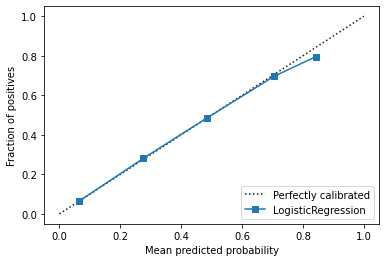

In [91]:
from sklearn.calibration import CalibrationDisplay

plt.figure(figsize=(30,5))
disp = CalibrationDisplay.from_estimator(lr_poly,X_test_std_poly3[non_zero_thetas.features.unique()],np.ravel(y_test_enc))

plt.show()




Ótimo, o modelo está quase que perfeitamente calibrado, podemos usar o score para retornar a real probabilidade dos clientes a fecharem négocio. É interessante ter esse dado para poder quantificar as análises de riscos para maior liberação de crédito nos momentos mais quentes do mercado, ou até mesmo descontos em determinados períodos.